# Future Price Prediction using Facebook Prophet

### Loading the Dataset

In [5]:
pip install prophet


  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/24/2b/834e9a347f2f0161e32a3c6125b8a1ebdf6ac33199a0ed3a0bdf1f0c296f/prophet-1.1.5-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/5d/12/6522f3de83ca690aa52f4b8c88a1e203abb1e2d75c31669dc004949143cd/cmdstanpy-1.2.4-py3-none-any.whl.metadata
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/cb/34/59312c116708e2bf0293f2f03914643739e4dfd5e958b5e6092ffa54ea23/holidays-0.55-py3-none-any.whl.metadata
  Using cached holidays-0.55-py3-none-any.whl.metadata (23 kB)
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/db/2a/728c8ae66011600fac5731a7db030d23c42f1321fd9547654f0c3b2b32d7/importlib_resources-6.4.4-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.o

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from prophet import Prophet


In [2]:
df=pd.read_csv('avocado.csv')

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,3,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
df.duplicated().sum()

0

### Exploring Dataset

In [8]:
df=df.sort_values('Date')

### Plot Date and Average Price

Text(0.5, 1.0, 'Date vs Average Price')

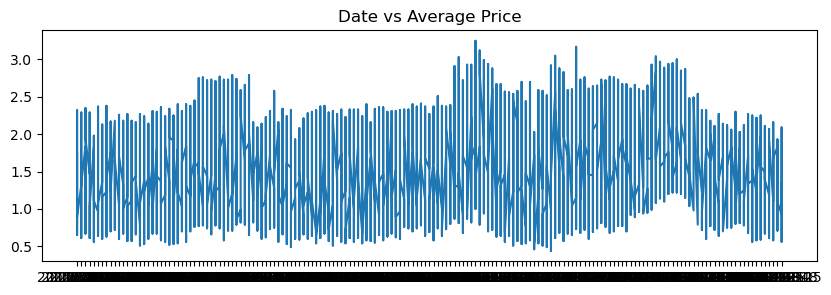

In [9]:
plt.figure(figsize=(10,3))
plt.plot(df['Date'],df['AveragePrice'])
plt.title('Date vs Average Price')

### Distribution Plot of Average Price

Text(0.5, 1.0, 'Distribution of Average Price')

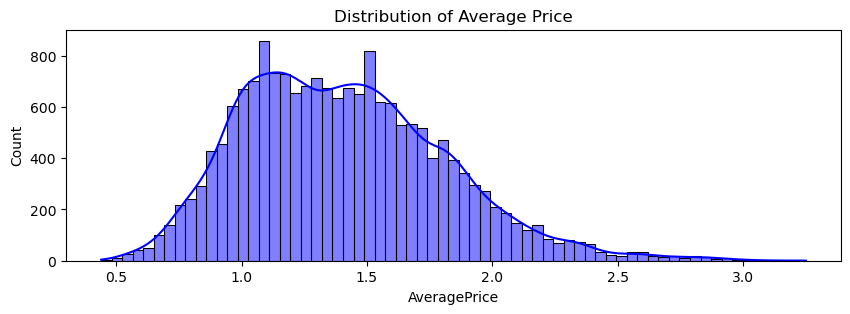

In [10]:
plt.figure(figsize=(10,3))
sns.histplot(df['AveragePrice'],color='b',kde=True)
plt.title('Distribution of Average Price')

### Violin Plot of Average Price vs Avocado Type

Text(0.5, 1.0, 'Average Price vs Avocado Type')

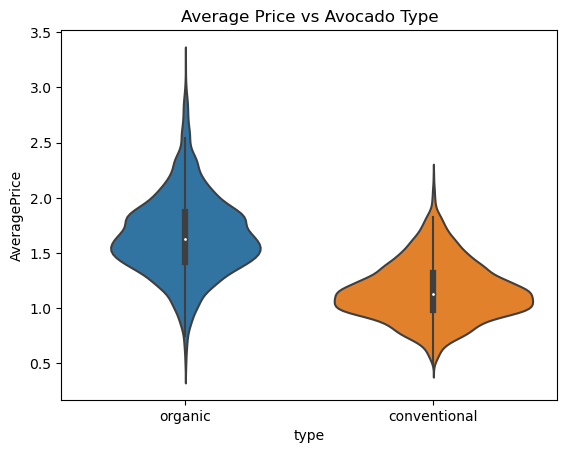

In [11]:
sns.violinplot(y='AveragePrice',x='type',data=df)
plt.title('Average Price vs Avocado Type')

### Bar Chart to Indicate no of regions

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Southeast'),
  Text(1, 0, 'Chicago'),
  Text(2, 0, 'HarrisburgScranton'),
  Text(3, 0, 'Pittsburgh'),
  Text(4, 0, 'Boise'),
  Text(5, 0, 'WestTexNewMexico'),
  Text(6, 0, 'LosAngeles'),
  Text(7, 0, 'LasVegas'),
  Text(8, 0, 'Atlanta'),
  Text(9, 0, 'DallasFtWorth'),
  Text(10, 0, 'MiamiFtLauderdale'),
  Text(11, 0, 'Plains'),
  Text(12, 0, 'StLouis'),
  Text(13, 0, 'Syracuse'),
  Text(14, 0, 'Midsouth'),
  Text(15, 0, 'Sacramento'),
  Text(16, 0, 'Boston'),
  Text(17, 0, 'Charlotte'),
  Text(18, 0, 'Spokane'),
  Text(19, 0, 'Albany'),
  Text(20, 0, 'Houston'),
  Text(21, 0, 'SouthCarolina'),
  Text(22, 0, 'SanFrancisco'),
  Text(23, 0, 'TotalUS'),
  Text(24, 0, 'RaleighGreensboro'),
  Text(25, 0, 'BuffaloRochester'),
  Text(

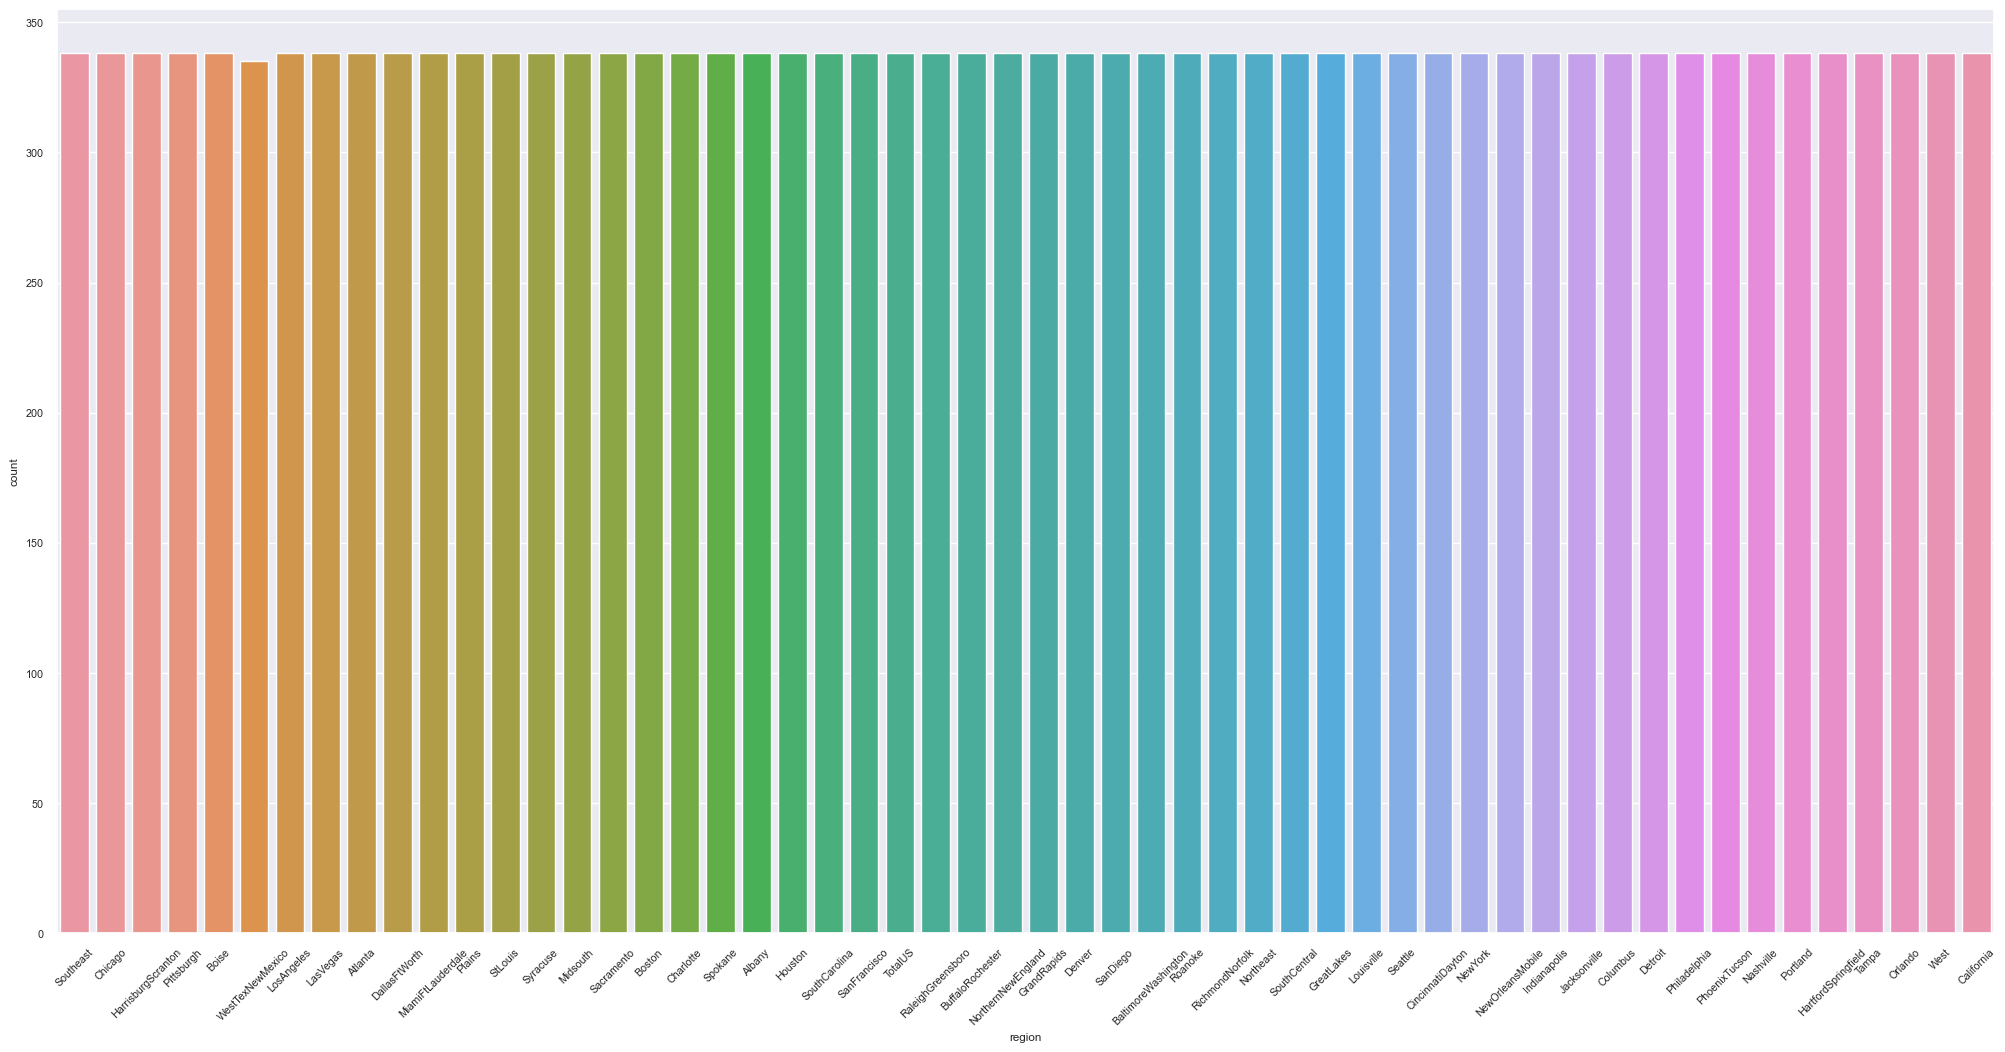

In [12]:
sns.set(font_scale=0.7)
plt.figure(figsize=(25,12))
sns.countplot(x='region',data=df)
plt.xticks(rotation=45)

### Bar Chart to indicate count in every year

(array([0, 1, 2, 3]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018')])

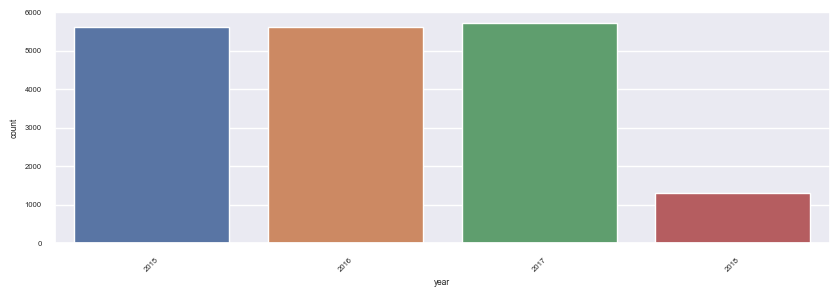

In [13]:
sns.set(font_scale=0.5)
plt.figure(figsize=(10,3))
sns.countplot(x='year',data=df)
plt.xticks(rotation=45)

### Catplot for Avocado Prices vs Regions for Conventional Avocados

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


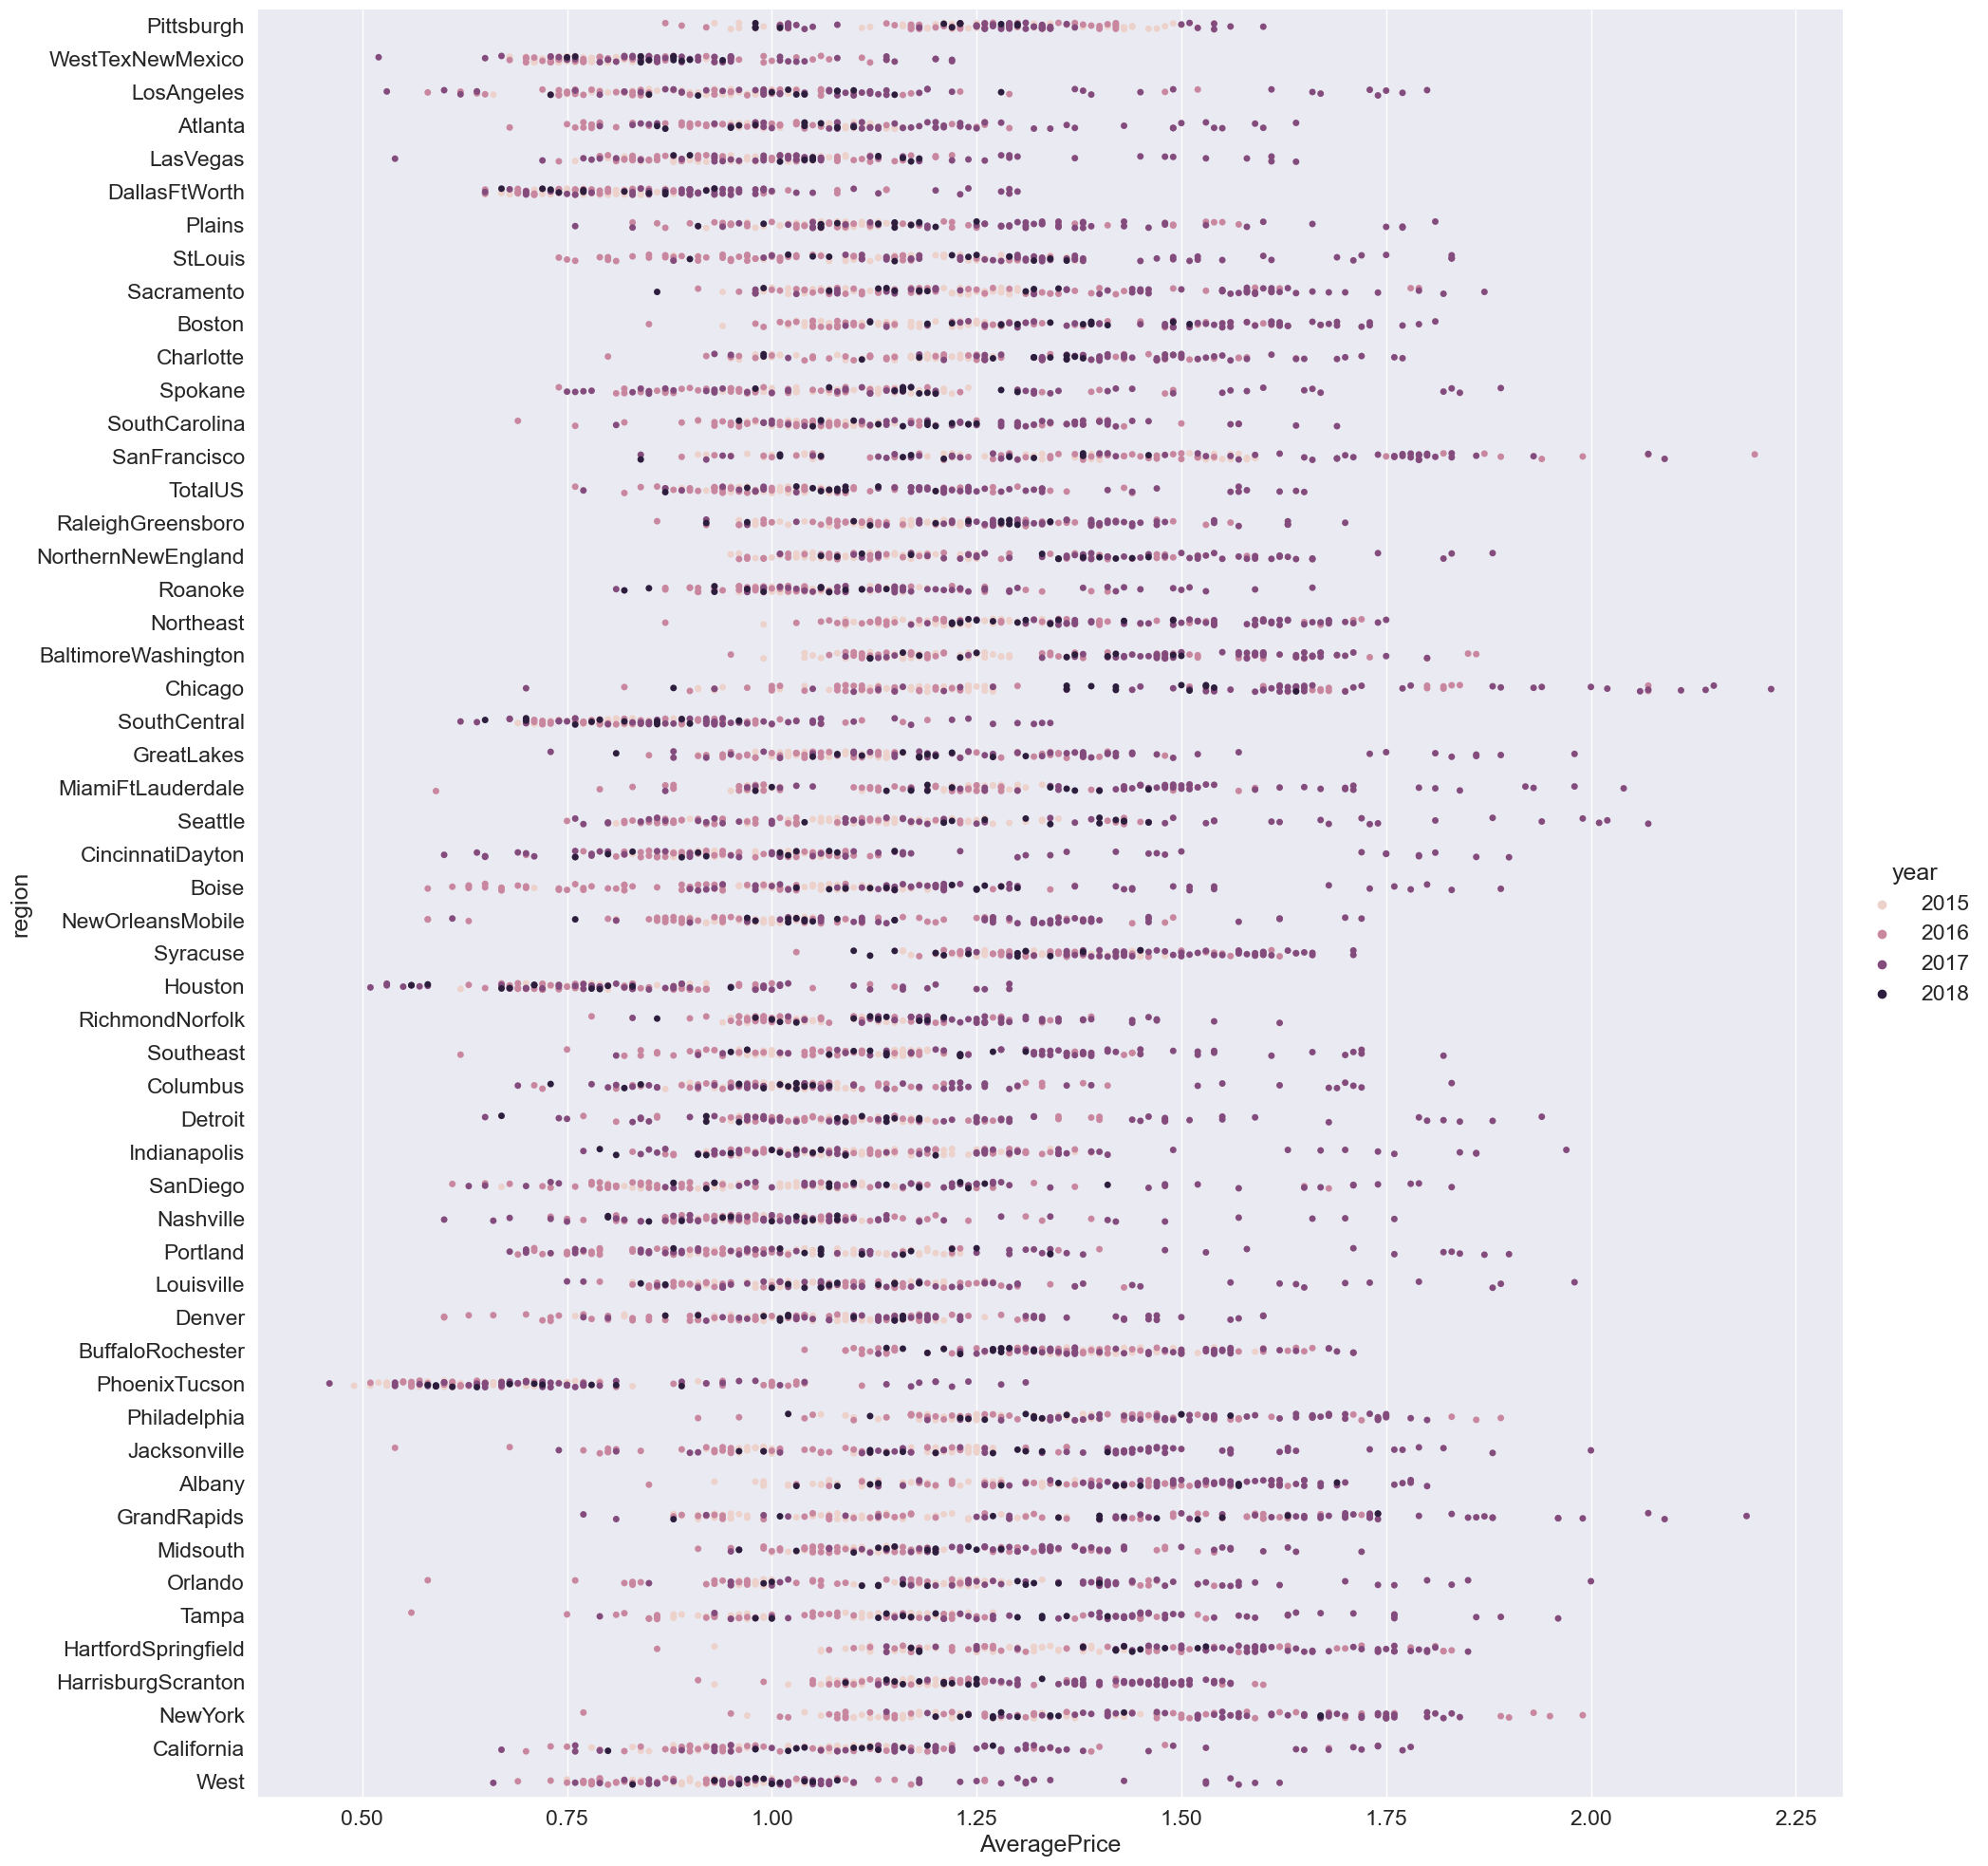

In [14]:
sns.set(font_scale=1.5)
sns.catplot(
    x='AveragePrice',  
    y='region',       
    data=df[df['type'] == 'conventional'], 
    hue='year',       
    height=20,          
)

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


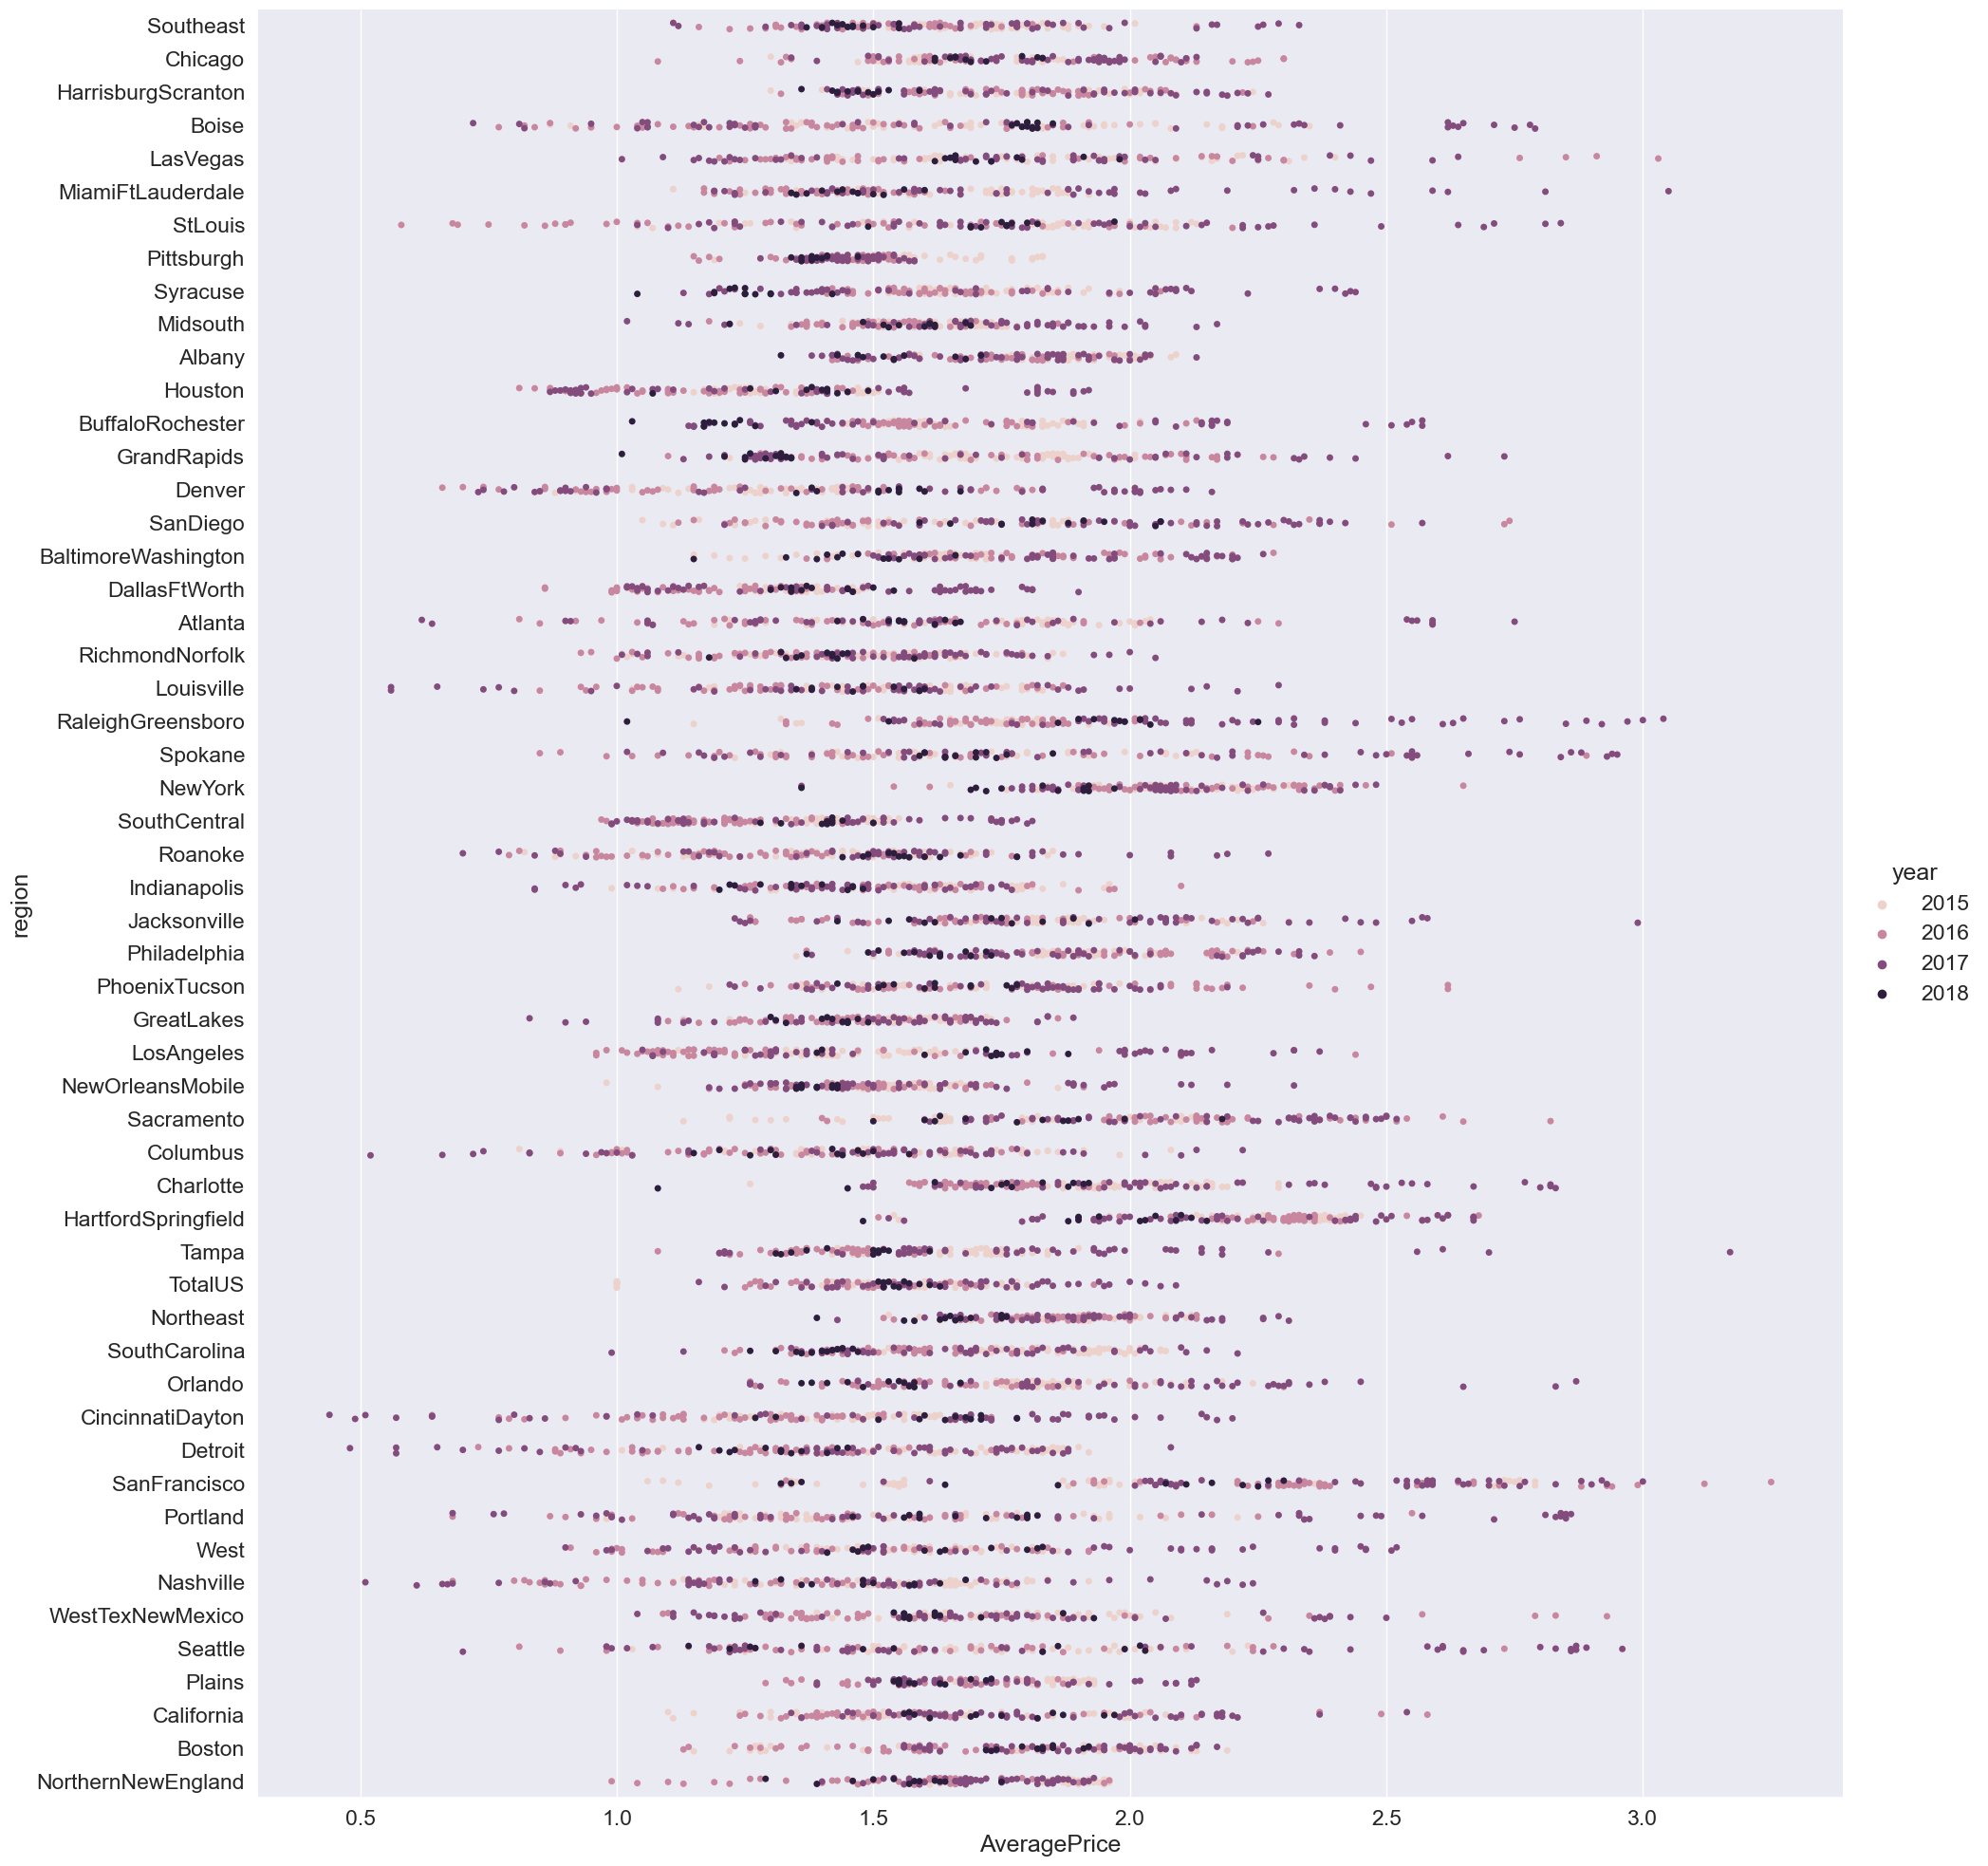

In [15]:
sns.set(font_scale=1.5)
sns.catplot(
    x='AveragePrice',  
    y='region',       
    data=df[df['type'] == 'organic'], 
    hue='year',       
    height=20,          
)


### Prepare Data before Applying Facebook Prophet Tool

In [16]:
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
2807,51,2015-01-04,0.75,758118.95,426878.87,147958.43,15267.89,168013.76,165202.22,2811.54,0.00,conventional,2015,WestTexNewMexico
1195,51,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,LosAngeles
10269,51,2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,0.00,organic,2015,LasVegas
103,51,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
1143,51,2015-01-04,0.80,317861.35,134003.07,120628.37,4591.23,58638.68,58126.59,512.09,0.00,conventional,2015,LasVegas


In [17]:
prophet_df=df[['Date','AveragePrice']]

In [18]:
prophet_df=prophet_df.rename(columns={'Date':'ds','AveragePrice':'y'})

In [19]:
prophet_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


### Develop Model and Make Predictions

In [21]:
m=Prophet()
m.fit(prophet_df)

02:16:24 - cmdstanpy - INFO - Chain [1] start processing
02:16:28 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)

In [24]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498517,0.861808,1.899675,1.498517,1.498517,-0.113702,-0.113702,-0.113702,-0.113702,-0.113702,-0.113702,0.0,0.0,0.0,1.384815
1,2015-01-11,1.493341,0.926840,1.879199,1.493341,1.493341,-0.105274,-0.105274,-0.105274,-0.105274,-0.105274,-0.105274,0.0,0.0,0.0,1.388067
2,2015-01-18,1.488165,0.925588,1.842085,1.488165,1.488165,-0.104955,-0.104955,-0.104955,-0.104955,-0.104955,-0.104955,0.0,0.0,0.0,1.383211
3,2015-01-25,1.482990,0.860121,1.832214,1.482990,1.482990,-0.123919,-0.123919,-0.123919,-0.123919,-0.123919,-0.123919,0.0,0.0,0.0,1.359070
4,2015-02-01,1.477814,0.829465,1.800583,1.477814,1.477814,-0.152293,-0.152293,-0.152293,-0.152293,-0.152293,-0.152293,0.0,0.0,0.0,1.325521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.167515,0.549833,1.582863,0.979151,1.341018,-0.086476,-0.086476,-0.086476,-0.086476,-0.086476,-0.086476,0.0,0.0,0.0,1.081039
530,2019-03-22,1.166795,0.548014,1.600293,0.977770,1.340949,-0.084782,-0.084782,-0.084782,-0.084782,-0.084782,-0.084782,0.0,0.0,0.0,1.082013
531,2019-03-23,1.166076,0.587371,1.564935,0.976238,1.340831,-0.082813,-0.082813,-0.082813,-0.082813,-0.082813,-0.082813,0.0,0.0,0.0,1.083263
532,2019-03-24,1.165356,0.530937,1.594192,0.974571,1.340710,-0.080588,-0.080588,-0.080588,-0.080588,-0.080588,-0.080588,0.0,0.0,0.0,1.084768


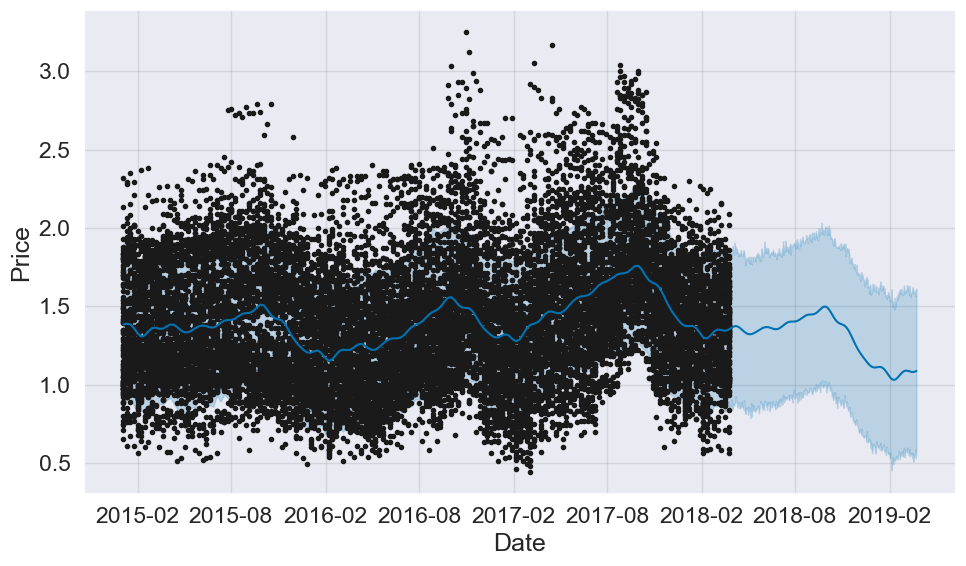

In [25]:
figure=m.plot(forecast,xlabel='Date',ylabel='Price')

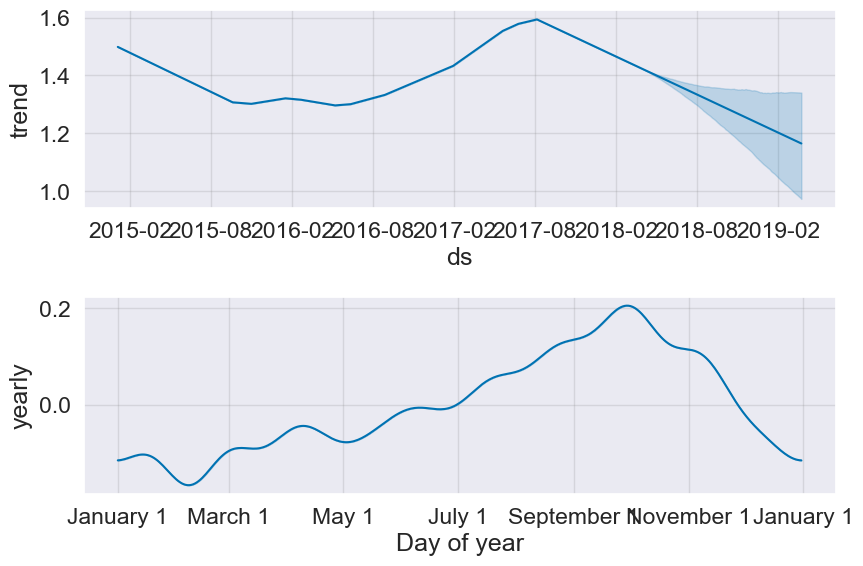

In [26]:
figure2=m.plot_components(forecast)

### Develop Model and Make Predictions (Region Specific)

In [28]:
df=pd.read_csv('avocado.csv')

In [29]:
df_sample=df[df['region']=='West']

In [30]:
df_sample=df_sample.sort_values('Date')

In [31]:
df_sample=df_sample.rename(columns={'Date':'ds','AveragePrice':'y'})

In [32]:
m=Prophet()
m.fit(df_sample)
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)

02:26:58 - cmdstanpy - INFO - Chain [1] start processing
02:26:58 - cmdstanpy - INFO - Chain [1] done processing


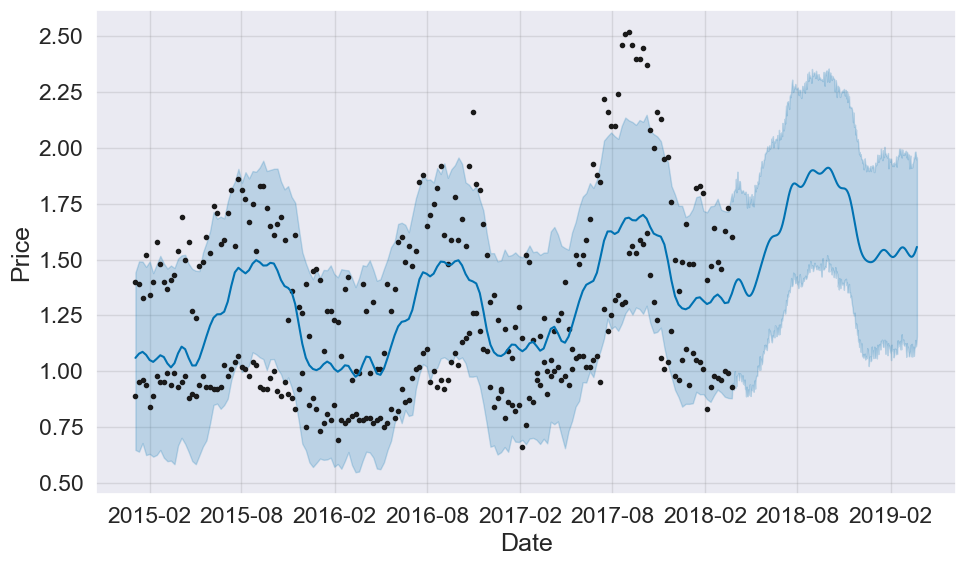

In [33]:
figure=m.plot(forecast,xlabel='Date',ylabel='Price')

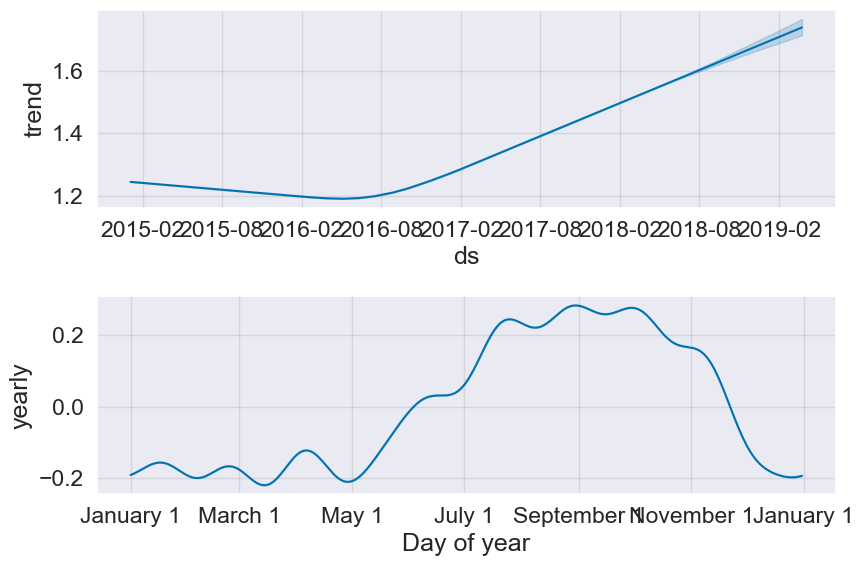

In [34]:
figure2=m.plot_components(forecast)